This code enables you to interactively select colors from an image and replace them with a different color.

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
#load a test image
im = Image.open('test_pic.png')
data = np.array(im)

In this cell you can pick colors by clicking

<IPython.core.display.Javascript object>


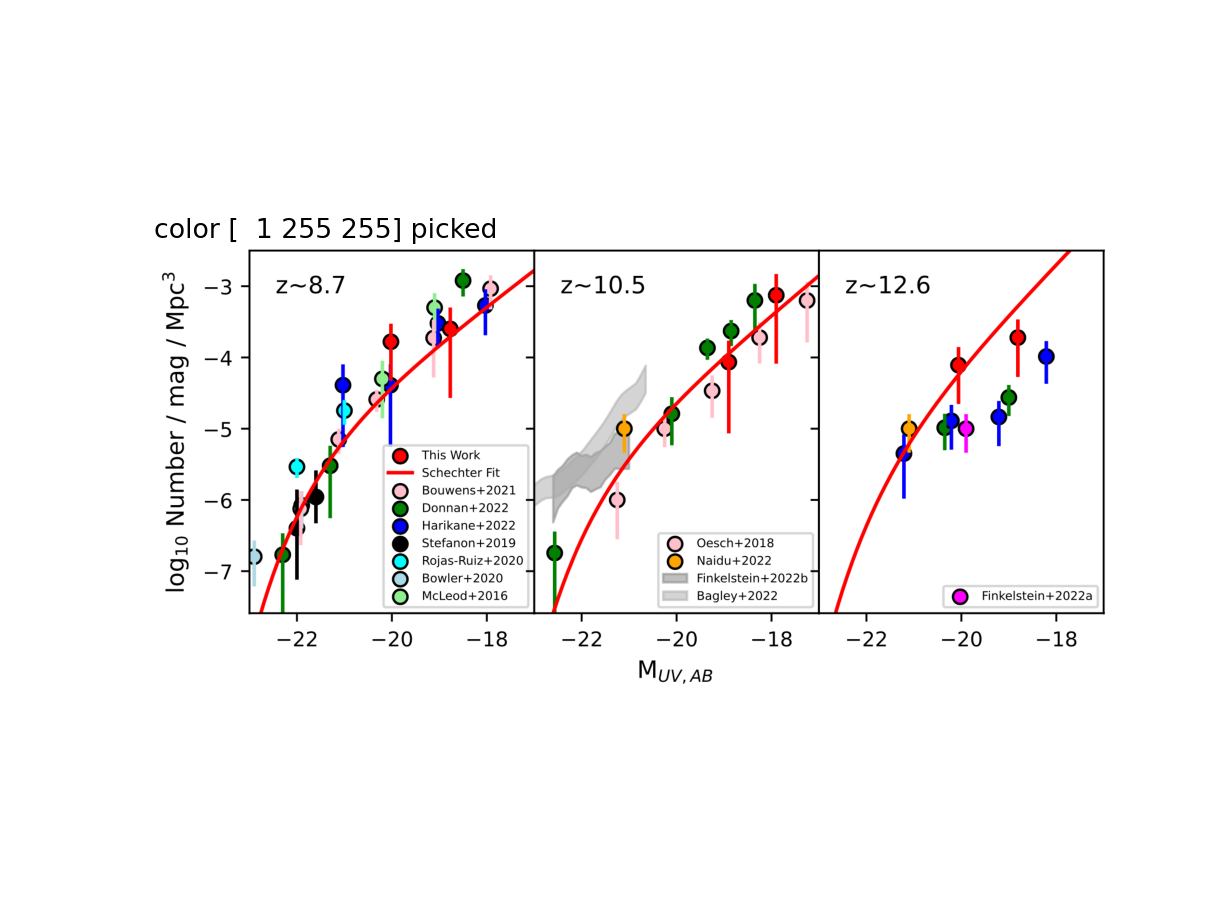

In [4]:
%matplotlib notebook#this is to make the plot interactive
fig, ax = plt.subplots()
ax.imshow(data)
ax.axis("off")
text=ax.text(0,0, "", va="bottom", ha="left")
colors=[]#store the picked colors
def onclick(event):
    x=event.xdata
    y=event.ydata
    rgb=data[int(y),int(x)]
    colors.append(rgb)
    tx=f'color {rgb} picked'
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [5]:
colors=np.array(colors)

(-0.5, 2.5, 0.5, -0.5)

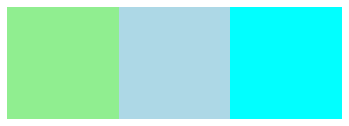

In [6]:
%matplotlib inline #change back to normal backend
plt.imshow(colors[np.newaxis,:])#plot the picked colors
plt.axis("off")

In [7]:
#change picked colors into new color
data_new=data.copy()
to_color=np.array([0,0,0])#here I change all of them into black
for color in colors:
    color_match=(data==color)
    data_new[np.where(np.sum(color_match,axis=2)==3)]=to_color

(-0.5, 1859.5, 865.5, -0.5)

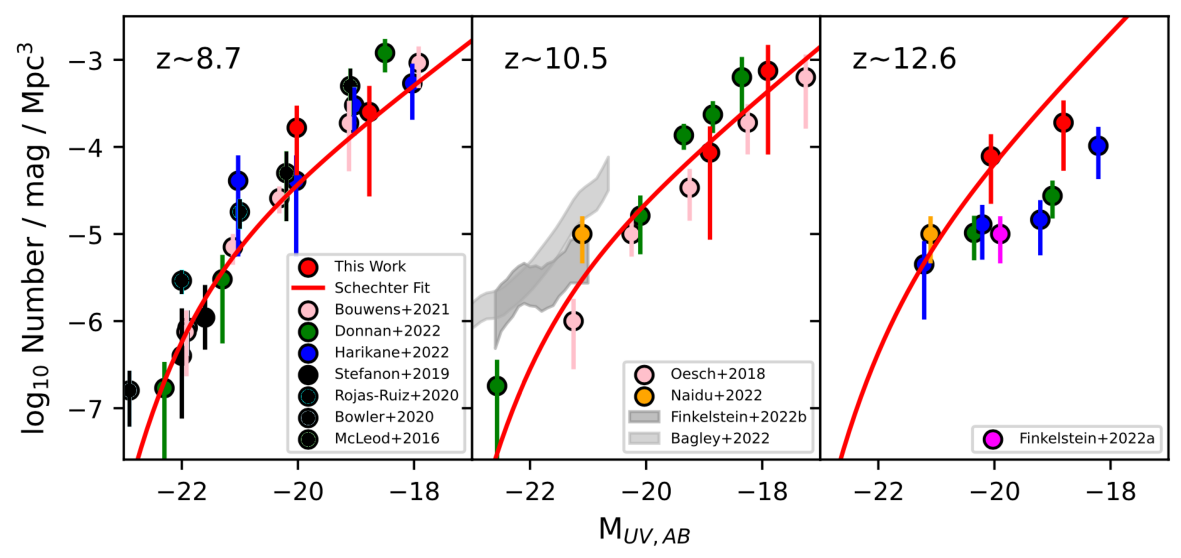

In [8]:
#look at the results
plt.figure(figsize=(30,10))
plt.imshow(data_new)
plt.axis("off")